# Market Basket Analysis on groceries data using apriori algorithm.

Ajeet Chaudhary


**What is Market basket analysis**

Affinity analysis is a data analysis and data mining technique that discovers co-occurrence relationships among activities performed by (or recorded about) specific individuals or groups. In general, this can be applied to any process where agents can be uniquely identified and information about their activities can be recorded. In retail, affinity analysis is used to perform market basket analysis, in which retailers seek to understand the purchase behavior of customers. This information can then be used for purposes of cross-selling and up-selling, in addition to influencing sales promotions, loyalty programs, store design, and discount plans. To know more please refer this wikipedia [link](https://en.wikipedia.org/wiki/Affinity_analysis)

**Apriori Algorithm:**

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.To know more please refer this wikipedia [link](https://en.wikipedia.org/wiki/Apriori_algorithm#:~:text=Apriori%20is%20an%20algorithm%20for,sufficiently%20often%20in%20the%20database.)

**Business use of market basket analysis:**

Business use of market basket analysis has significantly increased since the introduction of electronic point of sale.Amazon uses affinity analysis for cross-selling when it recommends products to people based on their purchase history and the purchase history of other people who bought the same item. Family Dollar plans to use market basket analysis to help maintain sales growth while moving towards stocking more low-margin consumable goods.

**Groceries dataset**

This is the groceries data with the list of items bought by customers. From the left side is the number of items in a basket then Item 1, 2, 3, etc stands for list of the items.

**Some important terms:**

**Support:**This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

**Confidence**: This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears

**Lift**:This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is

In [1]:
library(arules)
library(arulesViz)
library(tidyverse)
library(repr)
library(igraph)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

  

In [2]:
groceries_data <- read.transactions("../input/groceries/groceries.csv", sep=",")

**These are our first 10 transactions:**

In [3]:
inspect(groceries_data[1:10,])

     items                     
[1]  {citrus fruit,            
      margarine,               
      ready soups,             
      semi-finished bread}     
[2]  {coffee,                  
      tropical fruit,          
      yogurt}                  
[3]  {whole milk}              
[4]  {cream cheese,            
      meat spreads,            
      pip fruit,               
      yogurt}                  
[5]  {condensed milk,          
      long life bakery product,
      other vegetables,        
      whole milk}              
[6]  {abrasive cleaner,        
      butter,                  
      rice,                    
      whole milk,              
      yogurt}                  
[7]  {rolls/buns}              
[8]  {bottled beer,            
      liquor (appetizer),      
      other vegetables,        
      rolls/buns,              
      UHT-milk}                
[9]  {potted plants}           
[10] {cereals,                 
      whole milk}              


**Summary of our dataset:**

In [4]:
summary(groceries_data)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

**Points to notice in summary:**

* There are 9,835 transactions and 169 unique products which will each have their own column. The 'density' listed adjacent to the format of our sparse matrix represents how many of our cells are being used.

* Next we can see most frequent times occured in dataset. Whole milk was the most popular item sold with 2,513 units followed by other vegetables.

* Distribution of number of items sold in each transaction is displayed after the most frequent items. We can see 2,159 transactions only included a single item. The largest itemset included 32 items.

**Lets have a look at our top products:**

**By Support:**

These are items which exist atleast in 5% of transactions.

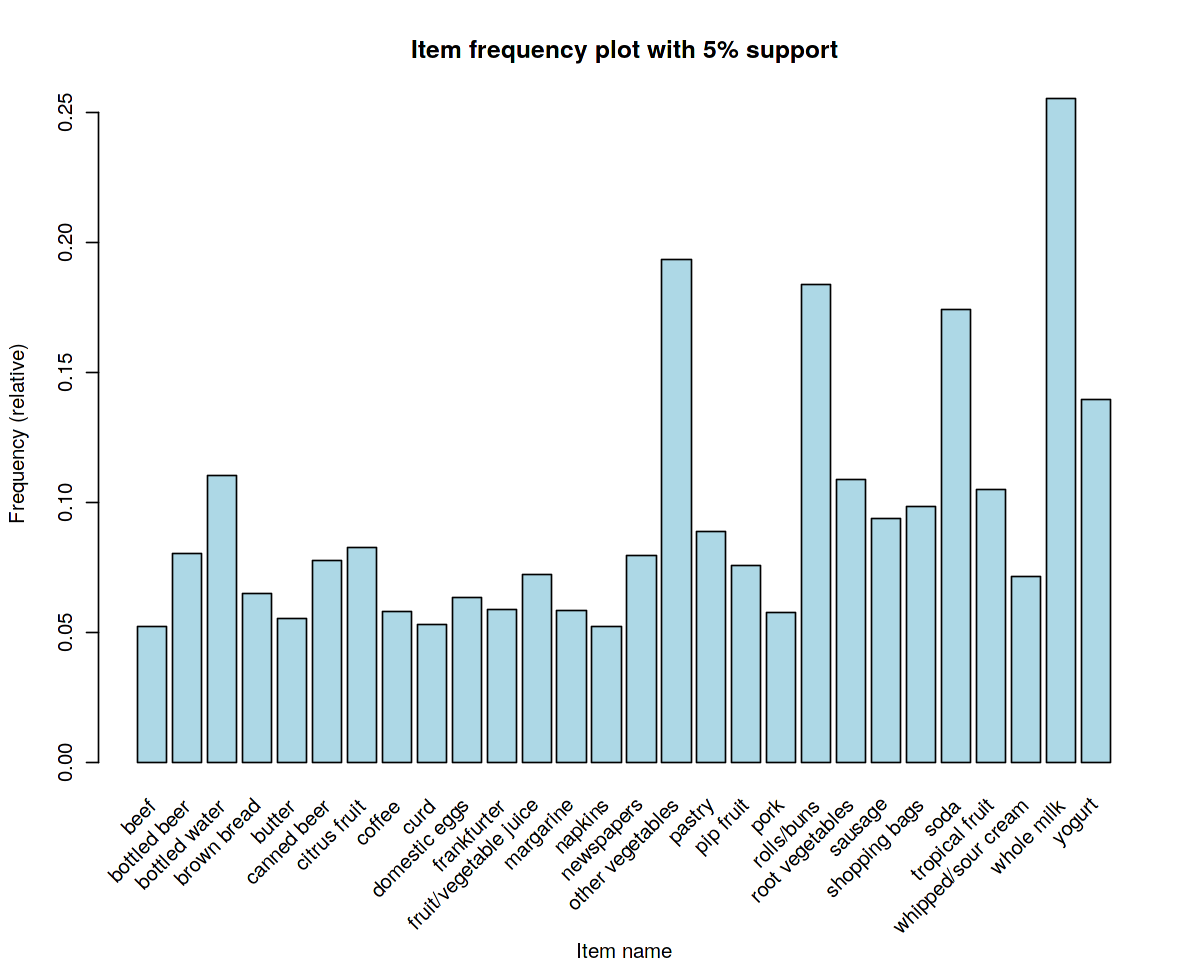

In [5]:
options(repr.plot.width=10,repr.plot.height=8)
itemFrequencyPlot(groceries_data, support = .05,col="lightblue",xlab="Item name", 
                  ylab="Frequency (relative)", main="Item frequency plot with 5% support")

**By Frequency (Absolute):**

Top 15 items with highest absolute frequency.

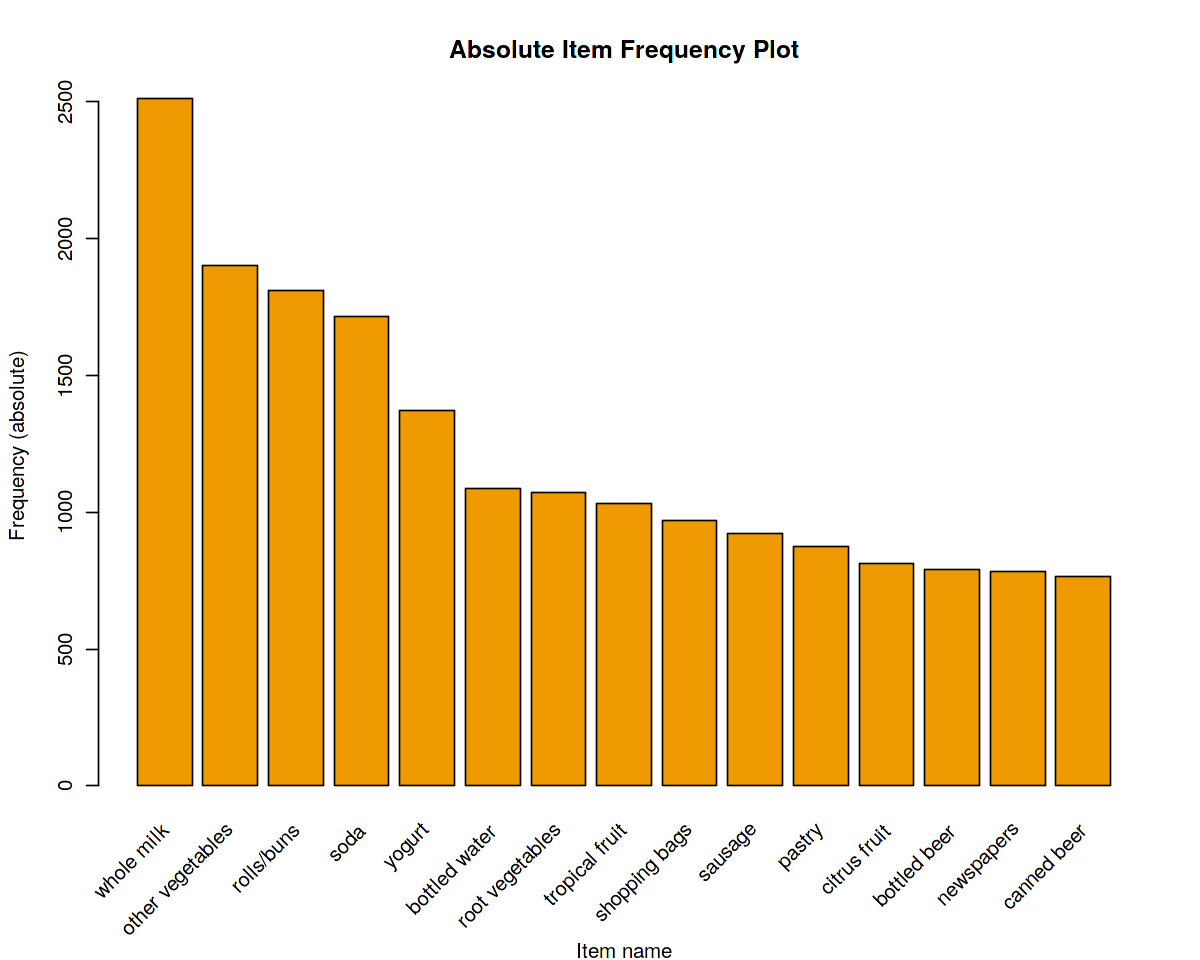

In [6]:

itemFrequencyPlot(groceries_data, topN=15, type="absolute", col="orange2",xlab="Item name", 
                  ylab="Frequency (absolute)", main="Absolute Item Frequency Plot")

**By Frequency(relative):**

Top 15 items with highest relative frequency.

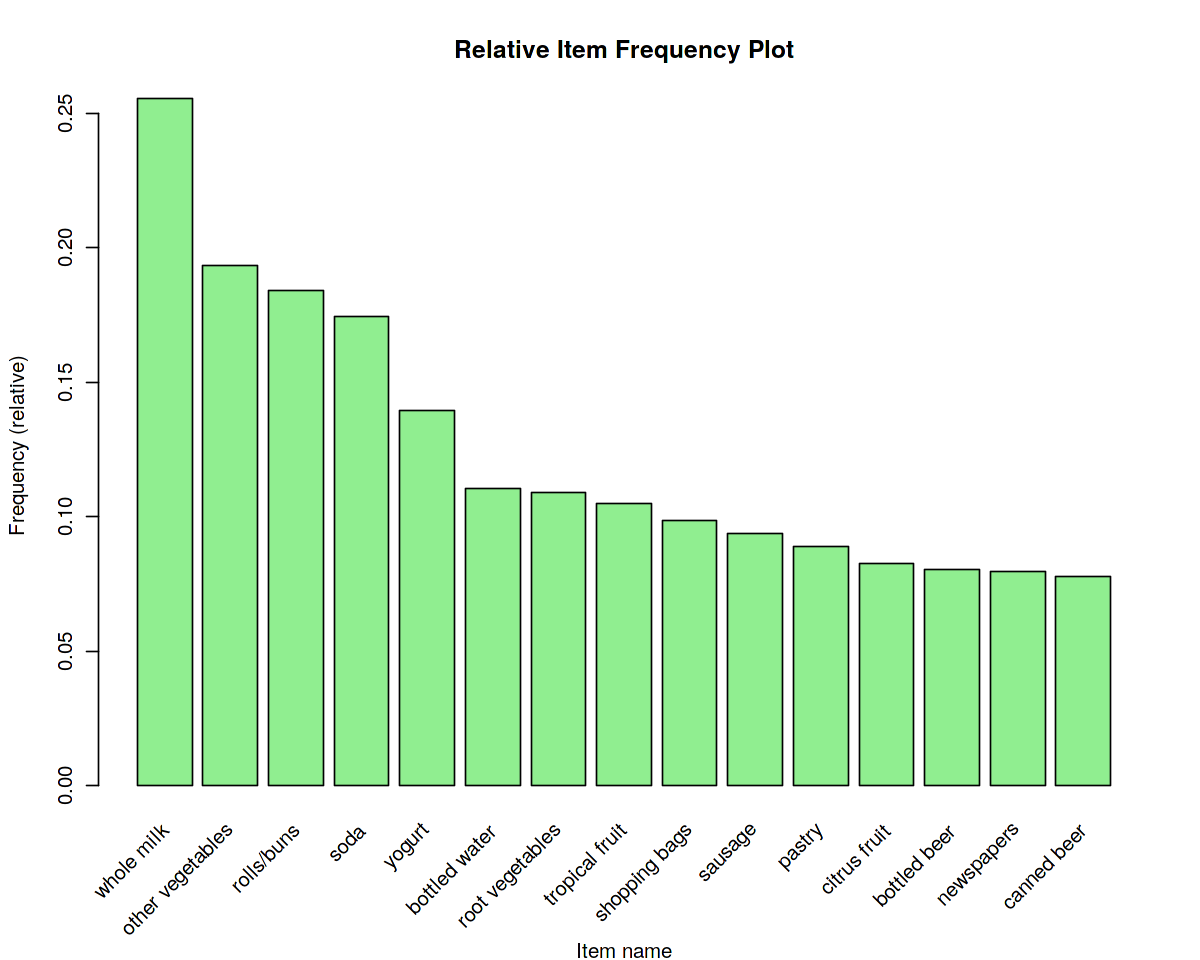

In [7]:
itemFrequencyPlot(groceries_data, topN=15, type="relative", col="lightgreen", xlab="Item name", 
                  ylab="Frequency (relative)", main="Relative Item Frequency Plot")

**Now lets apply our algorithm**

We are going to use threshold support value=0.03 and confidence value of 0.3. We are considering association with minimum length of 2. 

**Support:**This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

In [8]:
grocery_rules=apriori(groceries_data, parameter=list(support=.03, confidence=.3, minlen=2))
summary(grocery_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 295 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [44 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 14 rules

rule length distribution (lhs + rhs):sizes
 2 
14 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.03010   Min.   :0.3079   Min.   :0.07168   Min.   :1.205  
 1st Qu.:0.03249   1st Qu.:0.3298   1st Qu.:0.09021   1st Qu.:1.475  
 Median :0.03910   Median :0.3802   Median :0.10696   Median :1.575  
 Mean   :0.04260   Mean   :0.3759   Mean   :0.11484   Mean   :1.604  
 3rd Qu.:0.04853   3rd Qu.:0.4027   3rd Qu.:0.13226   3rd Qu.:1.759  
 Max.   :0.07483   Max.   :0.4496   Max.   :0.19349   Max.   :2.247  
     count      
 Min.   :296.0  
 1st Qu.:319.5  
 Median :384.5  
 Mean   :419.0  
 3rd Qu.:477.2  
 Max.   :736.0  

mining info:
           data ntransactions support confidence
 groceries_data          9835    0.03        0.3

**Rules with highest lift value:**

In [9]:
inspect(sort(grocery_rules, by="lift"))

     lhs                     rhs                support    confidence
[1]  {root vegetables}    => {other vegetables} 0.04738180 0.4347015 
[2]  {sausage}            => {rolls/buns}       0.03060498 0.3257576 
[3]  {tropical fruit}     => {other vegetables} 0.03589222 0.3420543 
[4]  {whipped/sour cream} => {whole milk}       0.03223183 0.4496454 
[5]  {root vegetables}    => {whole milk}       0.04890696 0.4486940 
[6]  {yogurt}             => {other vegetables} 0.04341637 0.3112245 
[7]  {tropical fruit}     => {whole milk}       0.04229792 0.4031008 
[8]  {yogurt}             => {whole milk}       0.05602440 0.4016035 
[9]  {pip fruit}          => {whole milk}       0.03009659 0.3978495 
[10] {other vegetables}   => {whole milk}       0.07483477 0.3867578 
[11] {pastry}             => {whole milk}       0.03324860 0.3737143 
[12] {citrus fruit}       => {whole milk}       0.03050330 0.3685504 
[13] {bottled water}      => {whole milk}       0.03436706 0.3109476 
[14] {rolls/buns}   

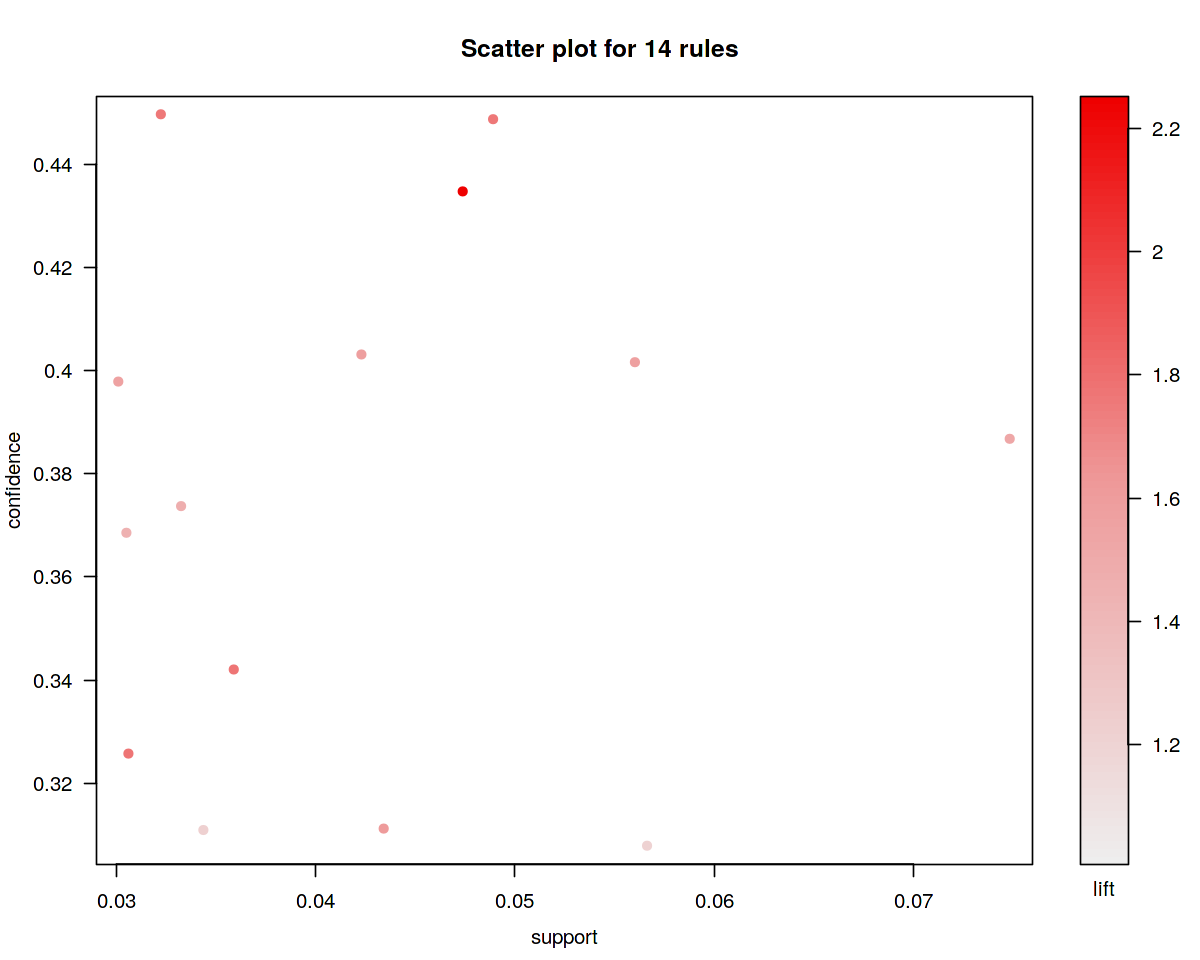

In [10]:
plot(grocery_rules)

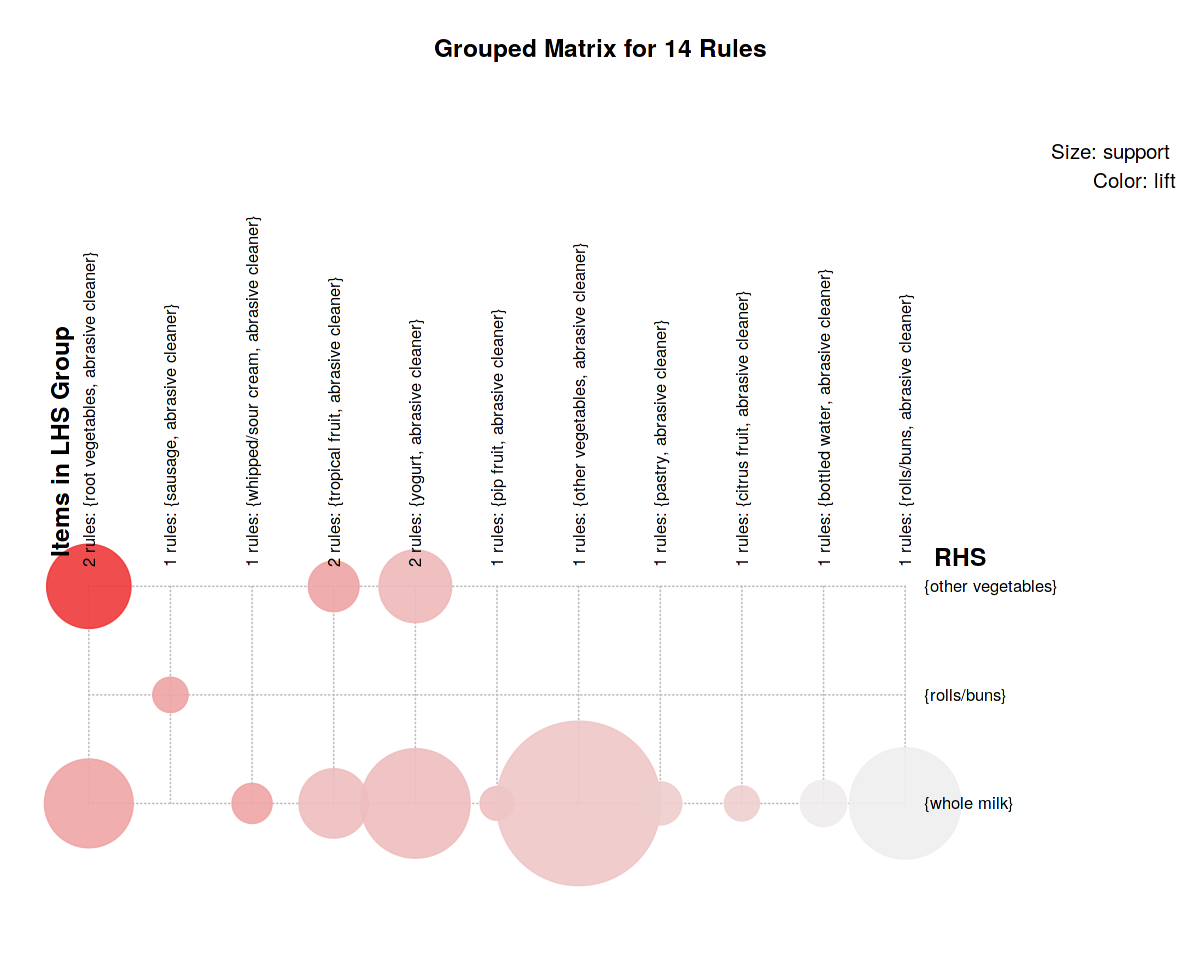

In [11]:
plot(grocery_rules,method="grouped")

**graphical representation:**

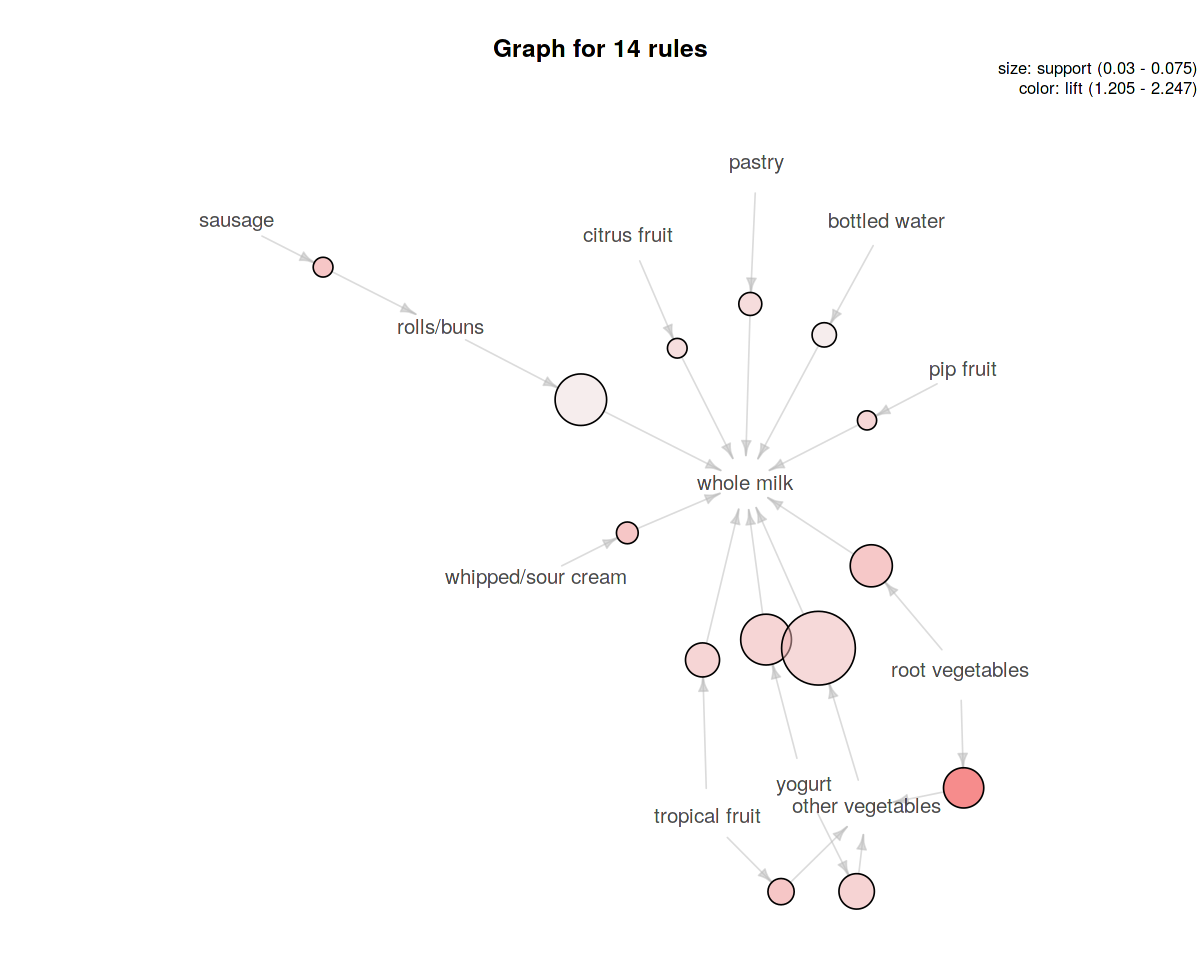

In [12]:
plot(grocery_rules,method="graph")

**Circular graphical representation:**

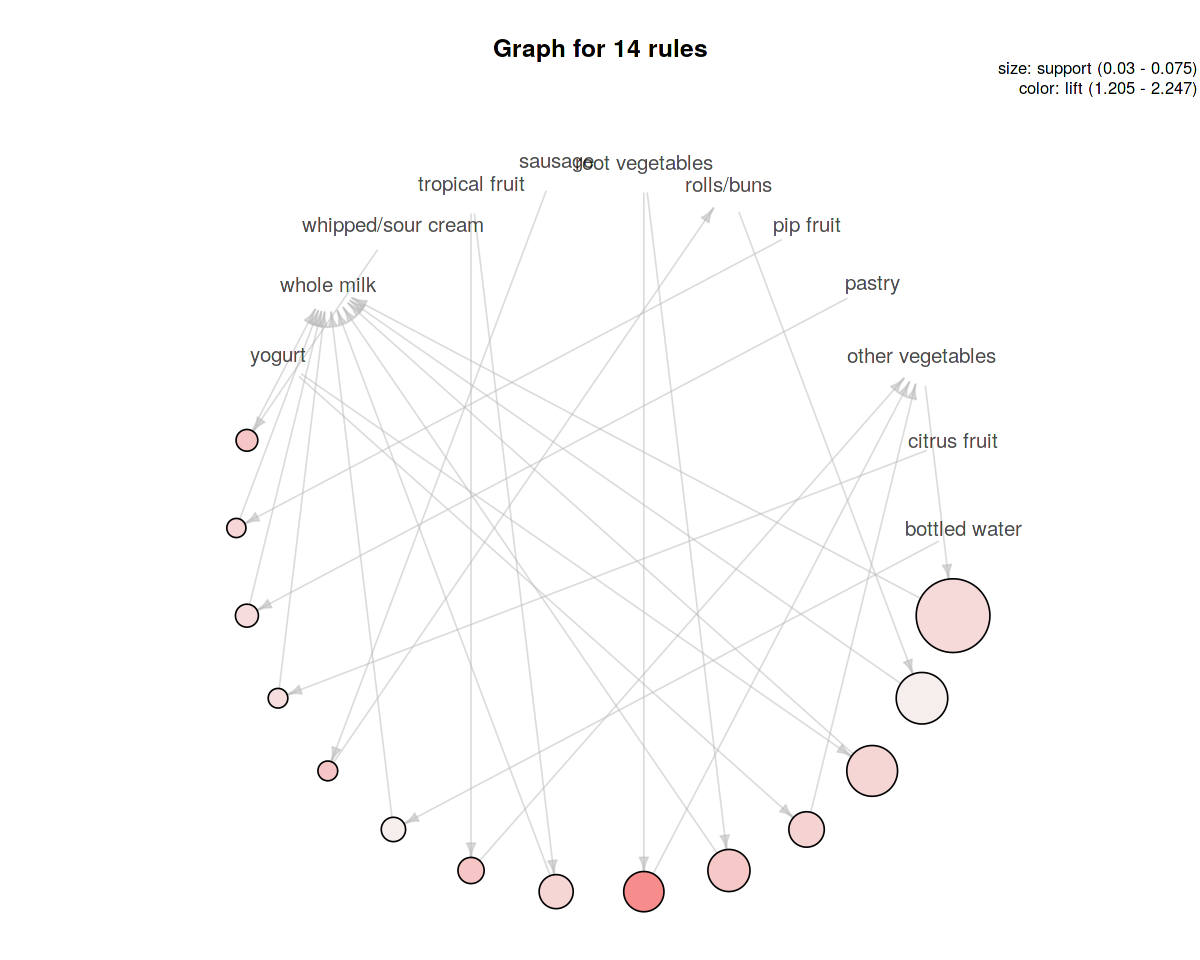

In [13]:

plot(grocery_rules, method="graph", control=list(layout=igraph::in_circle()))

**Parallel Coordinates graphical representation:**

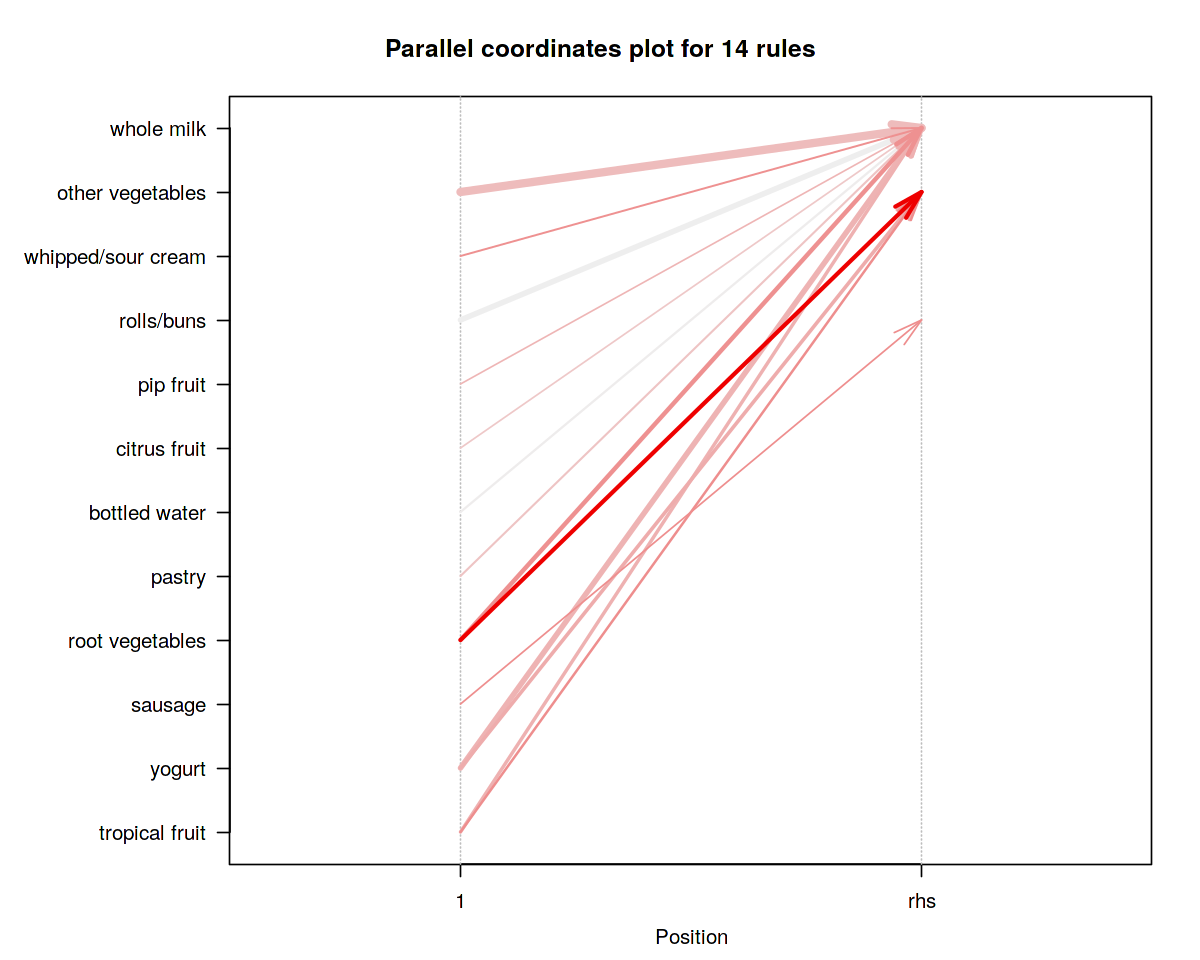

In [14]:

plot(grocery_rules, method="paracoord", control=list(reorder=TRUE))

In this kernel we performed market basket analysis on groceries dataset using Apriori Algorithm.

**Please hit the upvote button and also leave your valuable suggestions in the comment box.**

If you have time please check my kernel [Sentiment analysis on Zomato hyderabad restaurant reviews](https://www.kaggle.com/ajeetchaudhary/sentiment-analysis-on-zomato-restaurant-reviews)

Thank you

